In [1]:
import numpy as np
import skimage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the ICs and mixing matrix
S_ = np.load('/data/bioprotean/SVD/ICA/IC_30/IC_S_30.npy')
A_ = np.load('/data/bioprotean/SVD/ICA/IC_30/IC_A_30.npy')

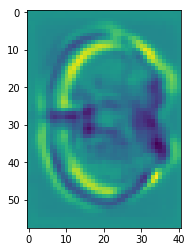

In [33]:
# Visualizing a slice
component = S_[:,16].reshape(67,58,41)
slice = component[27,:,:]
slice_vec = slice.reshape(-1,1)
plt.imshow(slice)

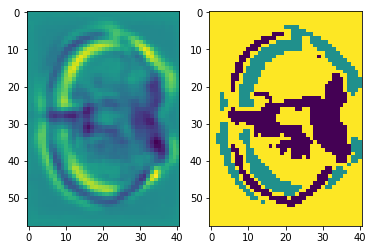

In [34]:
# Clustering the image
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=50)
kmeans.fit_predict(slice_vec)
kmeans_labels = kmeans.labels_
labels_slice = kmeans_labels.reshape((58,41))

# Visualizing the labels
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(slice)
ax2.imshow(labels_slice)
plt.show()

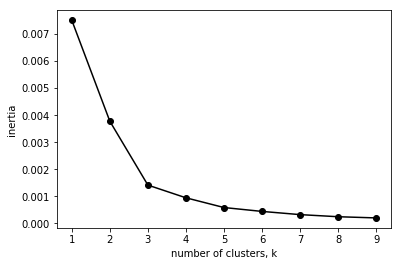

In [35]:
# Elbow method with inertias for finding the optimum K
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(slice.reshape(-1,1))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [5]:
# Seeing which bin each data point belongs to
data_bins = np.digitize(slice, bins=bins)
data_bins.shape

(58, 41)

In [6]:
# Making a 2D array of data and the corresponding bins
slice_1D = slice.reshape(-1)
data_bins_1D = data_bins.reshape(-1)
data_2D = np.column_stack((slice_1D, data_bins_1D))

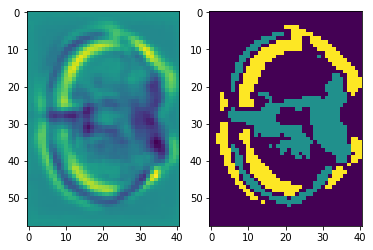

In [26]:
# Clustering the voxels
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=50)
kmeans.fit_predict(data_2D)
kmeans_labels = kmeans.labels_
labels_slice = kmeans_labels.reshape((58,41))

# Visualizing the labels
fig_labels, (ax1_labels, ax2_labels) = plt.subplots(1,2)
ax1_labels.imshow(slice)
ax2_labels.imshow(labels_slice)
plt.show()